# Neural Netrowork Classification with Tensorflow

This notebook is how to write neural network for classification problems

A few types of classification problems:

* Binary classification
* Multiclass classification
* Multilabel claassification

## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [4]:
# Check out the features and labels
X, y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64))

Visualize

In [6]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


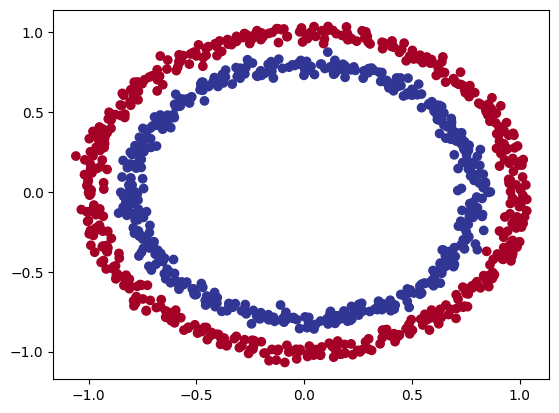

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and Output shapes

In [8]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [14]:
# View the first example of features and labels
X[0], y[0]

(array([ 0.60077633, -0.58742632]), 1)

## Steps in modelling

The steps in modelling with Tensorflow are typically:

1. Create or import a model
2. Compile the model
3. Fit the Model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [17]:
import tensorflow as tf
tf.__version__ 

'2.12.0'

In [16]:
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 811us/step - loss: 6.4760 - accuracy: 0.4870
Epoch 2/5
32/32 [==============================] - 0s 855us/step - loss: 6.3230 - accuracy: 0.4920
Epoch 3/5
32/32 [==============================] - 0s 803us/step - loss: 6.1168 - accuracy: 0.4970
Epoch 4/5
32/32 [==============================] - 0s 725us/step - loss: 5.9440 - accuracy: 0.4970
Epoch 5/5
32/32 [==============================] - 0s 739us/step - loss: 5.7552 - accuracy: 0.5030


In [18]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)

In [19]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 609us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... its'perfoming as if its's guessing.

So let's step things up a notch and add an extra layer

In [20]:
tf.random.set_seed(42)

# 1. Create the model, this time with 2 layer
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [21]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 679us/step - loss: 0.6933 - accuracy: 0.5000


[0.6932526230812073, 0.5]

## Improving our model

Let's look into out bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.

2. Compiling a model - here we might to choose a different optimization function such as  Adam instead of SGD.

3. Fitting a model - perhaps we might fit our model for more epoch (leave it training for longer).

In [23]:
tf.random.set_seed(42)

# 1. Create the model ( this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer of 10 dense neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [24]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 671us/step - loss: 0.6963 - accuracy: 0.5040


[0.6963489055633545, 0.5040000081062317]

To visulize our model's predictions, let's create a function

In [25]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 509us/step
doing binary classifcation...


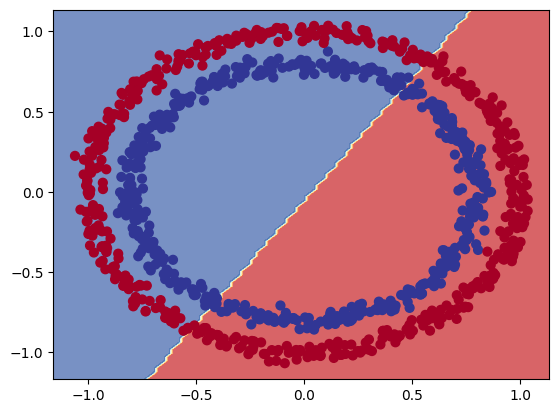

In [26]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)